# Part 1: Data Cleaning and Preprocessing

1.1 Loading and Inspecting the Dataset
    • Load the dataset and display its shape, column names, and data types.
    • Identify and list the number of missing values in each column.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [34]:
#Loading the dataset and displaying the head

filepath = "/Users/jincythomas/Desktop/Gitdata/Data601-HW4/Dataset/Building_Energy_Benchmarking_-_City_of_Calgary_20250130.csv"
df = pd.read_csv(filepath)
df1 = df
display(df.head(5))

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),District Hot Water Use (GJ),Electricity Use – Generated from Onsite Renewable Systems (kWh),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,280,152.4,368616,5453,NaN,NaN,368616.0,171.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,...,243,31.2,1091854,4725,NaN,NaN,1091854.0,508.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0,0.0,508589,3,2180,NaN,508589.0,236.0,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G0G2,Alberta,Office,1,1979,17468,...,26,1.5,1152308,506,6582,NaN,1152308.0,536.0,2023,2023-8854296
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143,...,253,118.1,508594,4926,NaN,NaN,508594.0,236.0,2023,2023-21988603


In [35]:
# Displaying shape, column names and data types.

print("\nThe dataset has",df.shape[0],"rows and",df.shape[1],"columns")


The dataset has 494 rows and 31 columns


In [36]:
print("\nThe columns of the dataset are:")
print("\n".join(df.columns))


The columns of the dataset are:
Property Id
Property Name
Address 1
City
Postal Code
Province
Primary Property Type - Self Selected
Number of Buildings
Year Built
Property GFA - Self-Reported (m²)
ENERGY STAR Score
Site Energy Use (GJ)
Weather Normalized Site Energy Use (GJ)
Site EUI (GJ/m²)
Weather Normalized Site EUI (GJ/m²)
Source Energy Use (GJ)
Weather Normalized Source Energy Use (GJ)
Source EUI (GJ/m²)
Weather Normalized Source EUI (GJ/m²)
Total GHG Emissions (Metric Tons CO2e)
Total GHG Emissions Intensity (kgCO2e/m²)
Direct GHG Emissions (Metric Tons CO2e)
Direct GHG Emissions Intensity (kgCO2e/m²)
Electricity Use - Grid Purchase (kWh)
Natural Gas Use (GJ)
District Hot Water Use (GJ)
Electricity Use – Generated from Onsite Renewable Systems (kWh)
Green Power - Onsite and Offsite (kWh)
Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)
Year Ending
Unique ID


In [37]:
print("\nThe datatypes of the dataset are:") 
print(df.dtypes)


The datatypes of the dataset are:
Property Id                                                                int64
Property Name                                                             object
Address 1                                                                 object
City                                                                      object
Postal Code                                                               object
Province                                                                  object
Primary Property Type - Self Selected                                     object
Number of Buildings                                                        int64
Year Built                                                                 int64
Property GFA - Self-Reported (m²)                                         object
ENERGY STAR Score                                                        float64
Site Energy Use (GJ)                                                      

In [38]:
# Identifying and listing the number of missing values in each column.

missing_values = df.isnull().sum()
print("\nMissing values for each column:\n")
print(missing_values)


Missing values for each column:

Property Id                                                                0
Property Name                                                              0
Address 1                                                                  0
City                                                                       0
Postal Code                                                                0
Province                                                                   0
Primary Property Type - Self Selected                                      0
Number of Buildings                                                        0
Year Built                                                                 0
Property GFA - Self-Reported (m²)                                          0
ENERGY STAR Score                                                        329
Site Energy Use (GJ)                                                       0
Weather Normalized Site Energy Use (GJ)   

1.2 Handling Missing Data
    • Drop columns with more than 40% missing values.
    • For numerical columns, fill missing values with the median of their respective column.
    • For categorical columns, fill missing values with the mode of their respective column.

In [39]:
# Dropping columns with more than 40% missing values.

df = df.dropna(axis = 1, thresh = 0.6*len(df))
print("\nThe shape of the dataset after dropping columns with more than 40% missing values is", df.shape)


The shape of the dataset after dropping columns with more than 40% missing values is (494, 26)


In [40]:
# Filling missing values of numerical columns with the median and categorical columns with mode.

numerical_columns = df.select_dtypes(include = ['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include = ['object']).columns
#df[numerical_columns] = df[numerical_columns].apply(lambda col : col.fillna(col.median()))
#df[categorical_columns] = df[categorical_columns].apply(lambda col : col.fillna(col.mode()[0]))
df.loc[:, numerical_columns] = df[numerical_columns].apply(lambda col: col.fillna(col.median()))
df.loc[:, categorical_columns] = df[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))
#Checking number of missing values in columns
#missingvalues1 = df.isnull().sum()
#print(missingvalues1)

display(df.head(5))

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,4.47,4.91,509,276.7,280,152.4,368616,5453,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,...,1.57,1.64,920,118.4,243,31.2,1091854,4725,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0.94,1.00,499,74.6,0,0.0,508589,3,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G0G2,Alberta,Office,1,1979,17468,...,0.97,1.04,1293,74.0,26,1.5,1152308,506,2023,2023-8854296
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143,...,4.00,4.27,568,265.2,253,118.1,508594,4926,2023,2023-21988603


1.3 Extracting and Cleaning Data Using Regex
    • Use Regex only to:
          o Extract numeric values from text-based numeric columns (e.g., Property GFA,
          Energy Use, Emissions).
          o Standardize Postal Codes to follow the Canadian format (A1A 1A1).
          o Clean and extract meaningful text from Property Names and Addresses.
          o Ensure extracted values are properly converted to numerical types for analysis.

In [96]:
# Extracting numeric values from text-based numeric columns and checking if they are converted to float type for analysis

import re

text_columns = df.select_dtypes(include = ['object']).columns
excluded_columns = ['Property Name', 'Address 1','City','Postal Code', 'Province','Primary Property Type - Self Selected','Unique ID']

numeric_pattern = r'[-+]?\d+(?:,\d{3})*(?:\.\d+)?'


def extract_all_numeric_values(text):
    matches = re.findall(numeric_pattern, str(text))
    return float(matches[0].replace(',', '')) if matches else None


for col in text_columns:
    if col not in excluded_columns:  

        #df[col] = df[col].apply(extract_all_numeric_values)
        df.loc[:, col] = df[col].apply(extract_all_numeric_values)

display(df.head(5))


,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID
0,10176804,Acadia Aquatic and Fitness Centre,9009 Fairmount Dr Se,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838.0,...,4.47,4.91,509.0,276.7,280.0,152.4,368616.0,5453.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 St Ne,Calgary,T2E 7L7,Alberta,Office,1,1981,7770.0,...,1.57,1.64,920.0,118.4,243.0,31.2,1091854.0,4725.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 Av Se,Calgary,T2G 0W2,Alberta,Office,1,1974,6681.0,...,0.94,1.00,499.0,74.6,0.0,0.0,508589.0,3.0,2023,2023-6305956
3,8854296,Andrew Davison,133 6 Av Se,Calgary,T2G 0G2,Alberta,Office,1,1979,17468.0,...,0.97,1.04,1293.0,74.0,26.0,1.5,1152308.0,506.0,2023,2023-8854296
4,21988603,Animal Services Centre,2201 Portland St Se,Calgary,T2G 4M7,Alberta,Office,1,2000,2143.0,...,4.00,4.27,568.0,265.2,253.0,118.1,508594.0,4926.0,2023,2023-21988603


In [97]:
#Check
df.dtypes


Property Id                                     int64
Property Name                                  object
Address 1                                      object
City                                           object
Postal Code                                    object
Province                                       object
Primary Property Type - Self Selected          object
Number of Buildings                             int64
Year Built                                      int64
Property GFA - Self-Reported (m²)              object
Site Energy Use (GJ)                           object
Weather Normalized Site Energy Use (GJ)        object
Site EUI (GJ/m²)                              float64
Weather Normalized Site EUI (GJ/m²)           float64
Source Energy Use (GJ)                         object
Weather Normalized Source Energy Use (GJ)      object
Source EUI (GJ/m²)                            float64
Weather Normalized Source EUI (GJ/m²)         float64
Total GHG Emissions (Metric 

In [98]:
# Standardizing Postal Codes to follow the Canadian format (A1A 1A1)

def format_postal_code(postal_code):
    
    cleaned_postal_code = re.sub(r'[^A-Za-z0-9]', '', str(postal_code)).upper()
    cleaned_postal_code = cleaned_postal_code.replace(" ", "")
    
    regex_canda_postal_code = r'^[A-Za-z]\d[A-Za-z]\d[A-Za-z]\d$'
    
    if re.match(regex_canda_postal_code, cleaned_postal_code):
        formatted_postal_code = cleaned_postal_code[:3] + ' ' + cleaned_postal_code[3:]
        return formatted_postal_code  
    else:
        return "Invalid Postal Code" 
        
#df['Postal Code'] = df['Postal Code'].apply(format_postal_code)
df.loc[:, 'Postal Code'] = df['Postal Code'].apply(format_postal_code)
display(df.head(5))

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID
0,10176804,Acadia Aquatic and Fitness Centre,9009 Fairmount Dr Se,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838.0,...,4.47,4.91,509.0,276.7,280.0,152.4,368616.0,5453.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 St Ne,Calgary,T2E 7L7,Alberta,Office,1,1981,7770.0,...,1.57,1.64,920.0,118.4,243.0,31.2,1091854.0,4725.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 Av Se,Calgary,T2G 0W2,Alberta,Office,1,1974,6681.0,...,0.94,1.00,499.0,74.6,0.0,0.0,508589.0,3.0,2023,2023-6305956
3,8854296,Andrew Davison,133 6 Av Se,Calgary,T2G 0G2,Alberta,Office,1,1979,17468.0,...,0.97,1.04,1293.0,74.0,26.0,1.5,1152308.0,506.0,2023,2023-8854296
4,21988603,Animal Services Centre,2201 Portland St Se,Calgary,T2G 4M7,Alberta,Office,1,2000,2143.0,...,4.00,4.27,568.0,265.2,253.0,118.1,508594.0,4926.0,2023,2023-21988603


In [99]:
# Cleaning and extracting meaningful text from Property Names and Addresses

def clean_data(entry):
    
    postal_code_pattern = r'\s?[A-Za-z]\d[A-Za-z]\s?\d[A-Za-z]\d\s*'
    
    entry = re.sub(r'\s+', ' ', entry)
    entry = re.sub(r'#', ' ', entry)
    entry = entry.title()
    entry = re.sub(r'&', 'and', entry)
    entry = re.sub(r'[^A-Za-z0-9\s]', '', entry)
    entry = re.sub(postal_code_pattern, '', entry)
    entry = entry.strip()
    return entry
    
# To do, remove Calgary ab

#df['Property Name'] = df['Property Name'].apply(clean_data)
#df['Address 1'] = df['Address 1'].apply(clean_data)

df.loc[:, 'Property Name'] = df['Property Name'].apply(clean_data)
df.loc[:, 'Address 1'] = df['Address 1'].apply(clean_data)

display(df.head(5))

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID
0,10176804,Acadia Aquatic And Fitness Centre,9009 Fairmount Dr Se,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838.0,...,4.47,4.91,509.0,276.7,280.0,152.4,368616.0,5453.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 St Ne,Calgary,T2E 7L7,Alberta,Office,1,1981,7770.0,...,1.57,1.64,920.0,118.4,243.0,31.2,1091854.0,4725.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 Av Se,Calgary,T2G 0W2,Alberta,Office,1,1974,6681.0,...,0.94,1.00,499.0,74.6,0.0,0.0,508589.0,3.0,2023,2023-6305956
3,8854296,Andrew Davison,133 6 Av Se,Calgary,T2G 0G2,Alberta,Office,1,1979,17468.0,...,0.97,1.04,1293.0,74.0,26.0,1.5,1152308.0,506.0,2023,2023-8854296
4,21988603,Animal Services Centre,2201 Portland St Se,Calgary,T2G 4M7,Alberta,Office,1,2000,2143.0,...,4.00,4.27,568.0,265.2,253.0,118.1,508594.0,4926.0,2023,2023-21988603


# Part 2: Exploratory Data Analysis (EDA) and Aggregations


2.1 Statistical Summary
• Generate summary statistics for numerical features using extracted data.
• Identify and explain key observations (e.g., outliers, mean vs. median differences).
2.2 Aggregations
• Compute the average Energy Use Intensity (EUI) by Property Type.
• Compute the total Greenhouse Gas (GHG) emissions by year.
• Identify the top 5 properties with the highest total energy consumption.
2.3 Detecting Outliers Using Regex and IQR
• Use Regex only to:
o Identify values that do not conform to expected numeric formats.
o Remove or correct incorrectly formatted numeric values.
• Apply the Interquartile Range (IQR) method to detect outliers in Total GHG Emissions
(Metric Tons CO2e).
• Replace outliers with the median value for that property type.

In [100]:
# Generating summary statistics for numerical features using extracted data

numerical_df = df.select_dtypes(include=['number'])
numerical_df = numerical_df.drop(columns=['Property Id', 'Year Ending'])
summary_statistics = numerical_df.describe()
#pd.set_option('display.float_format', '{:.2f}'.format)
display(summary_statistics)

,Number of Buildings,Year Built,Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions Intensity (kgCO2e/m²)
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,1.060729,1980.091093,1.774798,1.810324,2.282753,2.319717,158.671660,63.821862
std,0.278281,25.159568,1.306700,1.331529,1.597846,1.622897,109.472637,56.835735
min,1.000000,1896.000000,0.060000,0.060000,0.110000,0.110000,10.200000,0.000000
25%,1.000000,1970.000000,0.990000,1.000000,1.312500,1.350000,93.100000,33.325000
50%,1.000000,1978.000000,1.290000,1.310000,1.680000,1.690000,117.600000,43.900000
75%,1.000000,1996.000000,2.065000,2.110000,2.622500,2.652500,186.975000,74.050000
max,3.000000,2018.000000,8.430000,8.360000,10.130000,10.060000,666.200000,386.000000


In [101]:
#  Identifying and explaining key observations (e.g., outliers, mean vs. median differences)

outliers = pd.DataFrame()
observations = []

for col in numerical_df.columns:
    Q1 = numerical_df[col].quantile(0.25)
    Q3 = numerical_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean = numerical_df[col].mean()
    median = numerical_df[col].median()
    mean_median_diff = mean - median
    
    column_outliers = numerical_df[(numerical_df[col] < lower_bound) | (numerical_df[col] > upper_bound)]
    if not column_outliers.empty:
        outliers[col] = column_outliers[col]
        
    observations.append([col, column_outliers[col].shape[0], mean, median, mean_median_diff])
    observations_df = pd.DataFrame(observations,columns = ['Column', 'Number of Outliers', 'Mean', 'Median', 'Mean - Median Difference'])

display(observations_df)
    

,Column,Number of Outliers,Mean,Median,Mean - Median Difference
0,Number of Buildings,25,1.060729,1.00,0.060729
1,Year Built,25,1980.091093,1978.00,2.091093
2,Site EUI (GJ/m²),45,1.774798,1.29,0.484798
3,Weather Normalized Site EUI (GJ/m²),44,1.810324,1.31,0.500324
4,Source EUI (GJ/m²),50,2.282753,1.68,0.602753
5,Weather Normalized Source EUI (GJ/m²),51,2.319717,1.69,0.629717
6,Total GHG Emissions Intensity (kgCO2e/m²),42,158.671660,117.60,41.071660
7,Direct GHG Emissions Intensity (kgCO2e/m²),55,63.821862,43.90,19.921862


For all the columns mean is larger than the median values indicating the presence of extreme values at the upper bound. For all the properties in the dataset, the mean and median difference of various features is also quite similar. The number of outliers are alomost similar for energy feature columns.


plt.figure(figsize = (12, 8))
sns.boxplot(data = numerical_df)
plt.yscale('log')
plt.title("Boxplots for Numerical Columns")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


2.2 Aggregations

• Compute the average Energy Use Intensity (EUI) by Property Type.
• Compute the total Greenhouse Gas (GHG) emissions by year.
• Identify the top 5 properties with the highest total energy consumption.

In [102]:
# Computing the average Energy Use Intensity (EUI) by Property Type.

eui_columns = df.filter(regex = 'EUI', axis = 1)
average_eui = df.groupby('Primary Property Type - Self Selected')[eui_columns.columns].mean().reset_index()
display(average_eui)

,Primary Property Type - Self Selected,Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²)
0,Distribution Center,3.286000,3.284000,3.496000,3.492000
1,Fire Station,1.208827,1.223799,1.572849,1.587263
2,Fitness Center/Health Club/Gym,4.385000,4.472250,5.306750,5.398000
3,Heated Swimming Pool,4.805333,4.924000,5.895333,6.020000
4,Ice/Curling Rink,2.182200,2.220800,2.862400,2.903400
5,Indoor Arena,1.106000,1.148000,1.358000,1.404000
6,Mixed Use Property,0.458000,0.470000,0.522000,0.534000
7,Museum,1.584000,1.652000,2.050000,2.124000
8,Non-Refrigerated Warehouse,0.768000,0.781333,1.039333,1.052667
9,Office,1.519636,1.561000,2.072545,2.115364


In [103]:
# Computing the total Greenhouse Gas (GHG) emissions by year

tot_ghg_yearly = df.groupby('Year Ending')['Total GHG Emissions (Metric Tons CO2e)'].sum().reset_index()
display(tot_ghg_yearly)

,Year Ending,Total GHG Emissions (Metric Tons CO2e)
0,2019,47011.4
1,2020,44288.4
2,2021,43831.45
3,2022,44203.7
4,2023,43127.7


In [104]:
# Identifying the top 5 properties with the highest total energy consumption (not yearly)

tot_energy_use_propertywise = df.groupby('Property Name')['Site Energy Use (GJ)'].sum().reset_index()
#display(tot_energy_use_propertywise)

In [105]:
top_five_total_energy_consumers = tot_energy_use_propertywise.sort_values(by = 'Site Energy Use (GJ)', ascending = False).head(5)
print("\n Top five energy consumers:")
display(top_five_total_energy_consumers)


 Top five energy consumers:


,Property Name,Site Energy Use (GJ)
92,Stoney Transit Facility,726554.8
74,Municipal Complex,406124.1
95,Village Square Leisure Centre,396268.1
89,Southland Leisure Centre,245215.1
58,Foothills Aquatic Centre And Bauer And Bush Ar...,122386.6


2.3 Detecting Outliers Using Regex and IQR
    • Use Regex only to:
         o Identify values that do not conform to expected numeric formats.
         o Remove or correct incorrectly formatted numeric values.
    • Apply the Interquartile Range (IQR) method to detect outliers in Total GHG Emissions (Metric Tons CO2e).
    • Replace outliers with the median value for that property type.

In [106]:
#display(df.head(494))

# Used regex to clean and format the columns in previous steps.

In [107]:
# Appling the Interquartile Range (IQR) method to detect outliers in Total GHG Emissions (Metric Tons CO2e).

quant1 = df['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.25)
quant3 = df['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.75)
print("Q1:", quant1)
print("Q3:", quant3)

inter_quant_range = quant3 - quant1
print("IQR:", inter_quant_range)

lowerr_boundd = quant1 - 1.5 * inter_quant_range
upperr_boundd = quant3 + 1.5 * inter_quant_range
print("Lower bound:", lowerr_boundd) 
print("Upper bound:",  upperr_boundd)

outlierss = df[(df['Total GHG Emissions (Metric Tons CO2e)'] < lowerr_boundd) | 
              (df['Total GHG Emissions (Metric Tons CO2e)'] > upperr_boundd)]

print("\nNumber of outliers:")

display(outlierss.shape[0])

print("\nThe outliers are:\n",outlierss[['Total GHG Emissions (Metric Tons CO2e)']])

Q1: 113.85
Q3: 553.75
IQR: 439.9
Lower bound: -545.9999999999999
Upper bound: 1213.6

Number of outliers:


25


The outliers are:
     Total GHG Emissions (Metric Tons CO2e)
3                                   1293.0
10                                  1372.0
65                                  1442.0
84                                  1293.7
94                                  1279.1
100                                 1335.6
110                                 1501.1
145                                 7768.2
155                                 1372.0
184                                 1335.4
187                                 1413.2
244                                 7768.2
254                                 1476.9
293                                 7768.2
297                                 1269.0
302                                 1282.0
305                                 1452.0
313                                 1293.8
316                                 1531.4
320                                 1433.9
372                                 7768.2
383                               

In [108]:
# Finding median values of Total GHG Emissions by Propertytype
ghg_emm = df.groupby('Primary Property Type - Self Selected')['Total GHG Emissions (Metric Tons CO2e)'].median()
display(ghg_emm)

# Here the outliers are identified for the whole column but median replacement is done using medians of the corresponding property types as per the question. 
def replace_outliers(row):
    if row['Total GHG Emissions (Metric Tons CO2e)'] < lowerr_boundd or row['Total GHG Emissions (Metric Tons CO2e)'] > upperr_boundd:
        # Get the median GHG emissions for the property type
        median_value = df[df['Primary Property Type - Self Selected'] == row['Primary Property Type - Self Selected']]['Total GHG Emissions (Metric Tons CO2e)'].median()
        return median_value
    else:
        return row['Total GHG Emissions (Metric Tons CO2e)']

# Apply the function to replace outliers
#df['Total GHG Emissions (Metric Tons CO2e)'] = df.apply(replace_outliers, axis=1)
df.loc[:, 'Total GHG Emissions (Metric Tons CO2e)'] = df.apply(replace_outliers, axis=1)
pd.set_option('display.max_rows', None)
print(df['Total GHG Emissions (Metric Tons CO2e)'])
#display(df.head(100))

Primary Property Type - Self Selected
Distribution Center                                  7768.2
Fire Station                                          140.5
Fitness Center/Health Club/Gym                      785.675
Heated Swimming Pool                                  693.7
Ice/Curling Rink                                    911.325
Indoor Arena                                         1372.0
Mixed Use Property                                     65.0
Museum                                                287.1
Non-Refrigerated Warehouse                            550.9
Office                                               349.05
Other                                                  53.1
Other - Public Services                                53.0
Other - Recreation                                    125.9
Performing Arts                                       136.4
Repair Services (Vehicle, Shoe, Locksmith, etc.)     742.85
Self-Storage Facility                                 537.8
So

0        509.0
1        920.0
2        499.0
3       349.05
4        568.0
5        554.0
6        229.0
7        674.0
8         63.0
9        781.0
10      1372.0
11       777.0
12       477.0
13        49.0
14       265.0
15       799.0
16       356.2
17        43.0
18       169.0
19        85.0
20        24.0
21        49.0
22       369.0
23       409.0
24       160.0
25       121.0
26       213.0
27       108.0
28        81.0
29        72.0
30       433.0
31        72.0
32        90.0
33       172.0
34       111.0
35       137.0
36       104.0
37       104.0
38        93.0
39        92.0
40       130.0
41        94.0
42       149.0
43       133.0
44       277.0
45       162.0
46        25.0
47       207.0
48       217.0
49       144.0
50       157.0
51       243.0
52       139.0
53       215.0
54       158.0
55       114.0
56       105.0
57      916.55
58       117.0
59       464.0
60        42.0
61       705.0
62       927.0
63       214.0
64       339.0
65     911.325
66       9

In [109]:
# Finding median for the whole column

#median_tot_ghg_emissions = df['Total GHG Emissions (Metric Tons CO2e)'].median() 
#print("Median:",median_tot_ghg_emissions)

In [110]:
# Replacing outliers with median with median of the whole column

#df['Total GHG Emissions (Metric Tons CO2e)'] = df['Total GHG Emissions (Metric Tons CO2e)'].apply(
   # lambda x: median_tot_ghg_emissions if x < lowerr_boundd or x > upperr_boundd else x)



# Part 3: Data Visualization

3.1 Time-Series Visualization
• Plot the yearly trend of average Site Energy Use Intensity (EUI).
• Highlight any significant increases or decreases in energy usage.
3.2 Comparative Bar Charts
• Create a bar chart showing the top 10 buildings with the highest GHG emissions.
• Annotate the bar chart with emission values.
3.3 Heatmap Visualization
• Create a heatmap of energy usage intensity (Site EUI (GJ/m²)) across different property
types.

In [111]:
# Plotting the yearly trend of average Site Energy Use Intensity (EUI)

avg_eui_yearly = df.groupby('Year Ending')["Site EUI (GJ/m²)"].mean()

display(avg_eui_yearly)

Year Ending
2019    1.981313
2020    1.696869
2021    1.681515
2022    1.781616
2023    1.732245
Name: Site EUI (GJ/m²), dtype: float64

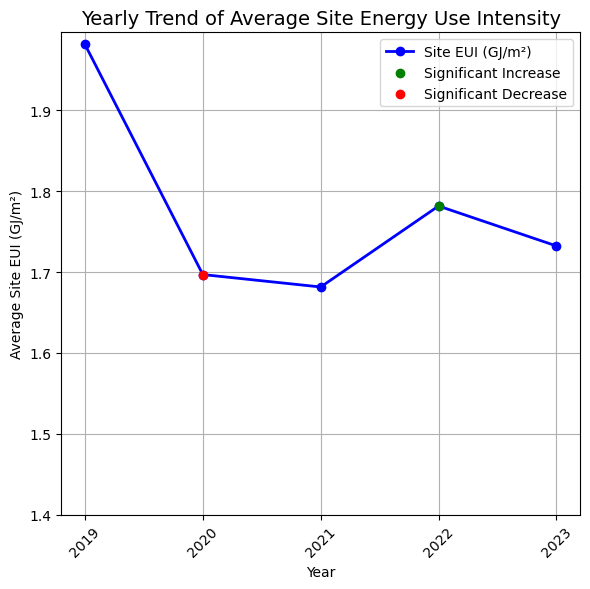

In [112]:
threshold = 0.1
yearly_diff = avg_eui_yearly.diff()
increase_sig = yearly_diff > threshold
drcrease_sig = yearly_diff < -threshold

plt.figure(figsize = (6,6))
     
avg_eui_yearly.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)  


plt.scatter(avg_eui_yearly.index[increase_sig], avg_eui_yearly[increase_sig], 
            color='g', label='Significant Increase', zorder=5)


plt.scatter(avg_eui_yearly.index[drcrease_sig], avg_eui_yearly[drcrease_sig], 
            color='r', label='Significant Decrease', zorder=5)


plt.title('Yearly Trend of Average Site Energy Use Intensity', fontsize = 14)
plt.xlabel('Year', fontsize = 10)
plt.ylabel('Average Site EUI (GJ/m²)', fontsize = 10)
plt.ylim(bottom = 1.4)
plt.grid(True)
plt.legend()
plt.xticks(avg_eui_yearly.index, rotation = 45)
plt.tight_layout()
plt.show()



In [113]:
# Creating bar chart showing the top 10 buildings with the highest GHG emissions (All years considered)

tot_ghg_emmsions_buidingwise = df.groupby('Property Name')['Total GHG Emissions (Metric Tons CO2e)'].sum().reset_index()
#display(tot_ghg_emmsions_buidingwise)


In [114]:
top_ten_ghg_emittors = tot_ghg_emmsions_buidingwise.sort_values(by = 'Total GHG Emissions (Metric Tons CO2e)',
                                                                ascending = False).head(10)
display(top_ten_ghg_emittors)


,Property Name,Total GHG Emissions (Metric Tons CO2e)
92,Stoney Transit Facility,38841.0
10,Calgary Soccer Centre And Annex,6860.0
1,Ad Valorem,5173.5
94,Thornhill Aquatic And Recreation Centre,5069.825
63,Henry Viney And Stew Hendry Arenas,4913.025
76,Optimist And George Blundun Arenas,4707.1
58,Foothills Aquatic Centre And Bauer And Bush Ar...,4582.75
72,Max Bell And Ken Bracko Arenas,4577.525
67,Killarney Aquatic And Recreation Centre,4487.0
66,Jimmie Condon And Rose Kohn Arenas,4446.05


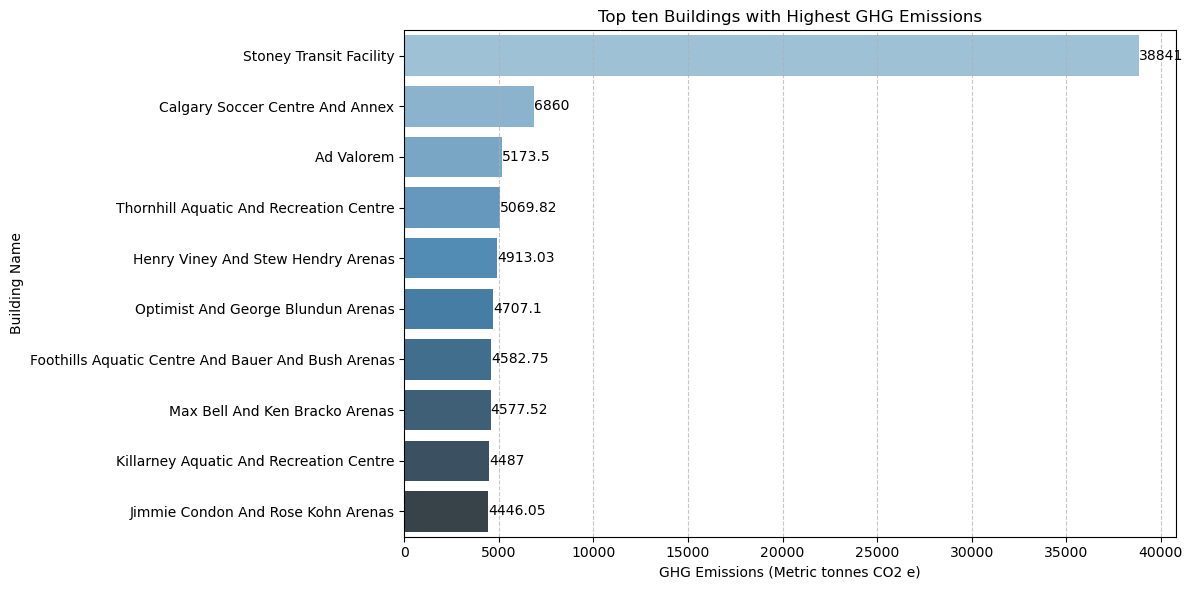

In [115]:
plt.figure(figsize = (12, 6))

ax = sns.barplot(y = top_ten_ghg_emittors['Property Name'], x = top_ten_ghg_emittors['Total GHG Emissions (Metric Tons CO2e)'],
            hue = top_ten_ghg_emittors['Property Name'],legend = False, palette = "Blues_d")

for i in ax.containers:
    ax.bar_label(i,)

plt.title('Top ten Buildings with Highest GHG Emissions', fontsize = 12)
plt.xlabel('GHG Emissions (Metric tonnes CO2 e)', fontsize = 10)
plt.ylabel('Building Name', fontsize = 10)
plt.grid(True, axis = 'x', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()


In [116]:
# Creating a heatmap of energy usage intensity (Site EUI (GJ/m²)) across different property types

energy_usage_intensity_propertytypes = df.groupby(['Primary Property Type - Self Selected','Year Ending'])['Site EUI (GJ/m²)'].sum().reset_index()
display(energy_usage_intensity_propertytypes)

,Primary Property Type - Self Selected,Year Ending,Site EUI (GJ/m²)
0,Distribution Center,2019,1.68
1,Distribution Center,2020,2.30
2,Distribution Center,2021,3.32
3,Distribution Center,2022,3.63
4,Distribution Center,2023,5.50
5,Fire Station,2019,46.91
6,Fire Station,2020,44.77
7,Fire Station,2021,43.56
8,Fire Station,2022,43.52
9,Fire Station,2023,37.62


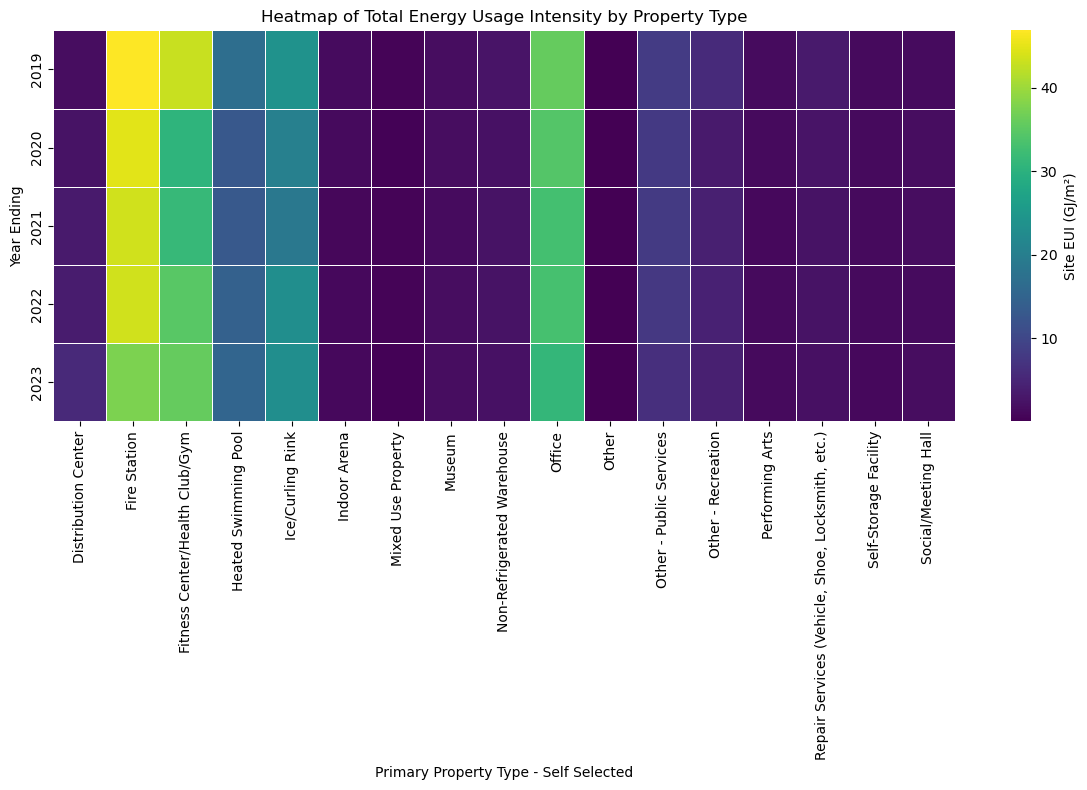

In [117]:
heatmap_data = energy_usage_intensity_propertytypes.pivot(index = 'Year Ending', columns = 'Primary Property Type - Self Selected', values = 'Site EUI (GJ/m²)')
plt.figure(figsize = (12, 8))
sns.heatmap(heatmap_data, annot = False, cmap = 'viridis', linewidths = 0.5,cbar_kws={'label': 'Site EUI (GJ/m²)'})
plt.title('Heatmap of Total Energy Usage Intensity by Property Type')
plt.tight_layout()
plt.show()

# Part 4: Further Analysis

4.1 Correlation Analysis
    • Compute and visualize the correlation matrix between energy consumption, emissions,and building size.
    • Identify any strong correlations and explain their implications.

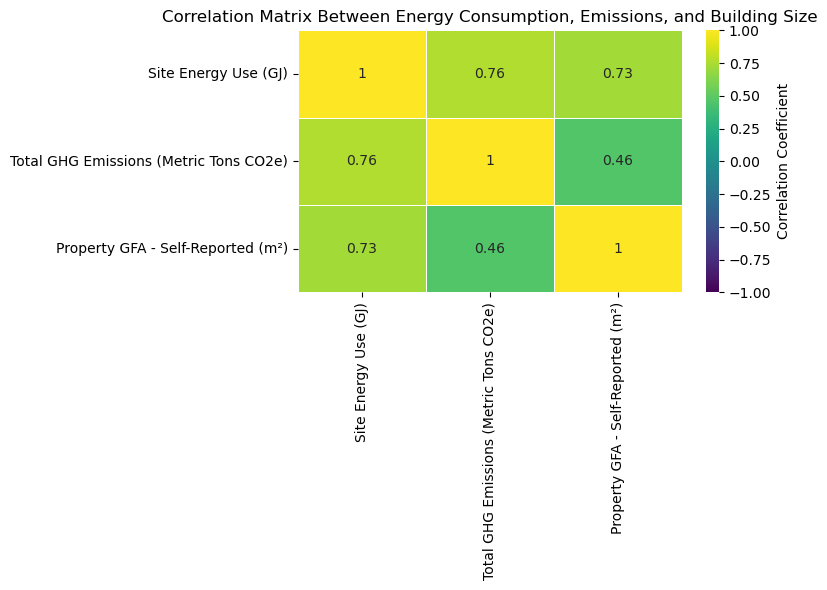

In [118]:
# Computing and visualizing the correlation matrix between energy consumption, emissions,and building size.

correlation_matrix = df[['Site Energy Use (GJ)', 'Total GHG Emissions (Metric Tons CO2e)','Property GFA - Self-Reported (m²)']].corr()
#print(correlation_matrix.round(2))

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'viridis', linewidths = 0.5, vmin = -1, vmax = 1, 
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix Between Energy Consumption, Emissions, and Building Size')
plt.tight_layout()
plt.show()


Strong positive correlation(0.73) between size of buildings and energy consumption indicates that there is a significant increase in energy consumption with the increase in size of the building even though other factors have a very slight influence.

Weak positive correlation between(0.17) between size of building and GHG emissions also indicates a slight increase in the emission of greenhouse gases with increasing size of buildings. The type of energy used might significantly affect the emissions.

There is a weak positive correlation (0.11) between Energy use and CHG emissions. The buidings which consume more energy will have higher emissions, but the weaker correlation suggests that other factors influence this.

4.2 Hypothesis Testing
    • Conduct a t-test (t-test is used to compare the means of two groups to determine if they are significantly different from each         other. More at Student's t-test - Wikipedia) comparing the average Energy Star Score between two different property types (eg.        Offices vs. Residential buildings).
    • Interpret the results and discuss statistical significance.

In [119]:

energy_score_warehouse = df1[df1['Primary Property Type - Self Selected'] == 'Non-Refrigerated Warehouse']['ENERGY STAR Score']
print("Number of missing values in energy_score_warehouse:",energy_score_warehouse.isna().sum())

energy_score_ice = df1[df1['Primary Property Type - Self Selected'] == 'Ice/Curling Rink']['ENERGY STAR Score']
print("Number of missing values in energy_score_ice :",energy_score_ice.isna().sum())
energy_score_ice = energy_score_ice.fillna(energy_score_ice.median())
#print("Number of missing values:",energy_score_ice.isna().sum())

#print(energy_score_ice)
#print(energy_score_swim)

t_stat, p_value = stats.ttest_ind(energy_score_warehouse, energy_score_ice, equal_var = False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.9f}")

if p_value < 0.05:
    print("\nThe difference is statistically significant. We reject the null hypothesis. Means are different ")
else:
    print("\nThe difference is not statistically significant. We fail to reject the null hypothesis.")


Number of missing values in energy_score_warehouse: 0
Number of missing values in energy_score_ice : 5
T-statistic: 8.3056
P-value: 0.000000002

The difference is statistically significant. We reject the null hypothesis. Means are different 


Since the p value is very less close to 0, there is no significant evidence to say that the mean energy scores of Non-Refrigerated Warehouse and Ice/Curling Rink are same. So we reject the null hypothesis that the means are equal. Their mean energy scores vary significantly.


# Part 5: Reporting and Insights

5.1 Summary Report
• Write a structured report (300-500 words) covering:
o Key trends in energy consumption and efficiency.
o Seasonal and property type variations.
o Recommendations for improving energy efficiency and reducing emissions.
  • Include supporting visualizations with clear titles, labels, and legends.
  • Submit the GitHub repository link in the report on D2L along with the Jupyter Notebook.
  • Highlight in the report where Regex was used for data cleaning and extraction.

In [120]:
# Consumption of natural gas vs electricity (grid purchased) over the years.

tot_elcgas_consum_yearly = df.groupby(['Year Ending'])[['Electricity Use - Grid Purchase (kWh)','Natural Gas Use (GJ)']].sum().reset_index()
display(tot_elcgas_consum_yearly)



,Year Ending,Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ)
0,2019,61984130.3,551388.4
1,2020,55220968.0,475290.0
2,2021,54369448.8,513438.7
3,2022,63374197.0,550759.0
4,2023,61996035.0,630989.0


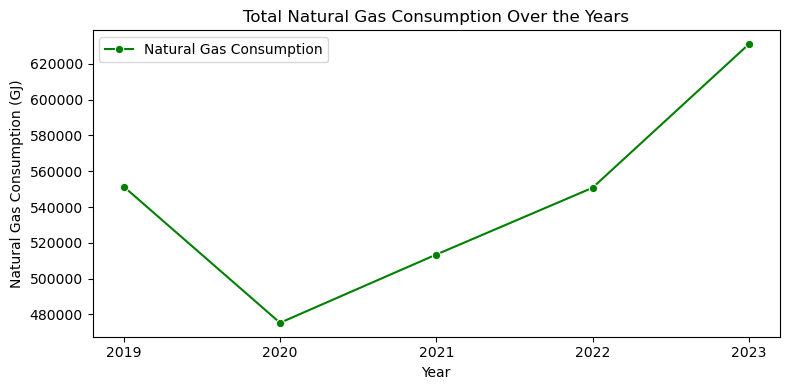

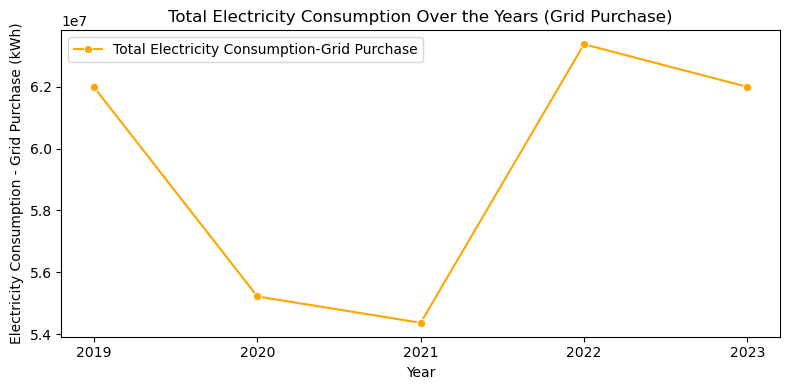

In [121]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize = (8,4))
sns.lineplot(data = tot_elcgas_consum_yearly, x = 'Year Ending', y = 'Natural Gas Use (GJ)',color = 'green', marker = 'o', label = 'Natural Gas Consumption')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer = True))
plt.title('Total Natural Gas Consumption Over the Years')
plt.xlabel('Year')
plt.ylabel('Natural Gas Consumption (GJ)')
plt.tight_layout()
plt.show()

plt.figure(figsize = (8,4))
sns.lineplot(data = tot_elcgas_consum_yearly, x = 'Year Ending', y = 'Electricity Use - Grid Purchase (kWh)', color = 'orange', marker='o', label ='Total Electricity Consumption-Grid Purchase')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer = True))
plt.title('Total Electricity Consumption Over the Years (Grid Purchase)')
plt.xlabel('Year')
plt.ylabel('Electricity Consumption - Grid Purchase (kWh)')
plt.tight_layout()
plt.show()

From the plots it is clear that a steep decrease in the energy consumption was seen in the time period 2019 to 2020. The natural gas consumption saw a steady increase from the year 2020 whereas electricity consumption (purchased from the power grid) saw a slight decline from 2020 to the next year. The electricity consumption have remained inconsistent over the years.  

In [122]:
# Calculating average energy efficiency over the years 

avg_energy_efficiency_yearly = df.groupby('Year Ending')['Site EUI (GJ/m²)'].mean().reset_index()
display(avg_energy_efficiency_yearly)


,Year Ending,Site EUI (GJ/m²)
0,2019,1.981313
1,2020,1.696869
2,2021,1.681515
3,2022,1.781616
4,2023,1.732245


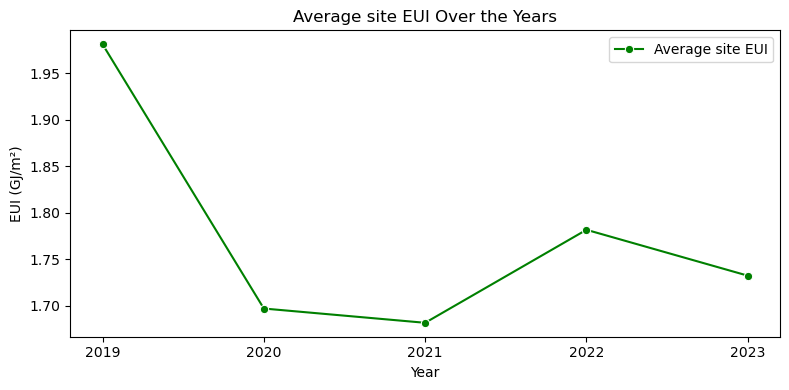

In [123]:
plt.figure(figsize = (8,4))
sns.lineplot(data = avg_energy_efficiency_yearly, x = 'Year Ending', y = 'Site EUI (GJ/m²)',color = 'green', marker = 'o', label = 'Average site EUI')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer = True))
plt.title('Average site EUI Over the Years')
plt.xlabel('Year')
plt.ylabel('EUI (GJ/m²)')
plt.tight_layout()
plt.show()

In [124]:
# Total Site energy use by different property types over the years

tot_siten_proptype_yearly = df.groupby(['Year Ending', 'Primary Property Type - Self Selected'])['Site Energy Use (GJ)'].sum().reset_index()
display(tot_siten_proptype_yearly)

,Year Ending,Primary Property Type - Self Selected,Site Energy Use (GJ)
0,2019,Distribution Center,74469.0
1,2019,Fire Station,66073.4
2,2019,Fitness Center/Health Club/Gym,217527.4
3,2019,Heated Swimming Pool,27433.9
4,2019,Ice/Curling Rink,128931.4
5,2019,Indoor Arena,22664.0
6,2019,Mixed Use Property,1158.4
7,2019,Museum,3474.6
8,2019,Non-Refrigerated Warehouse,30326.3
9,2019,Office,214736.8


TypeError: Image data of dtype object cannot be converted to float

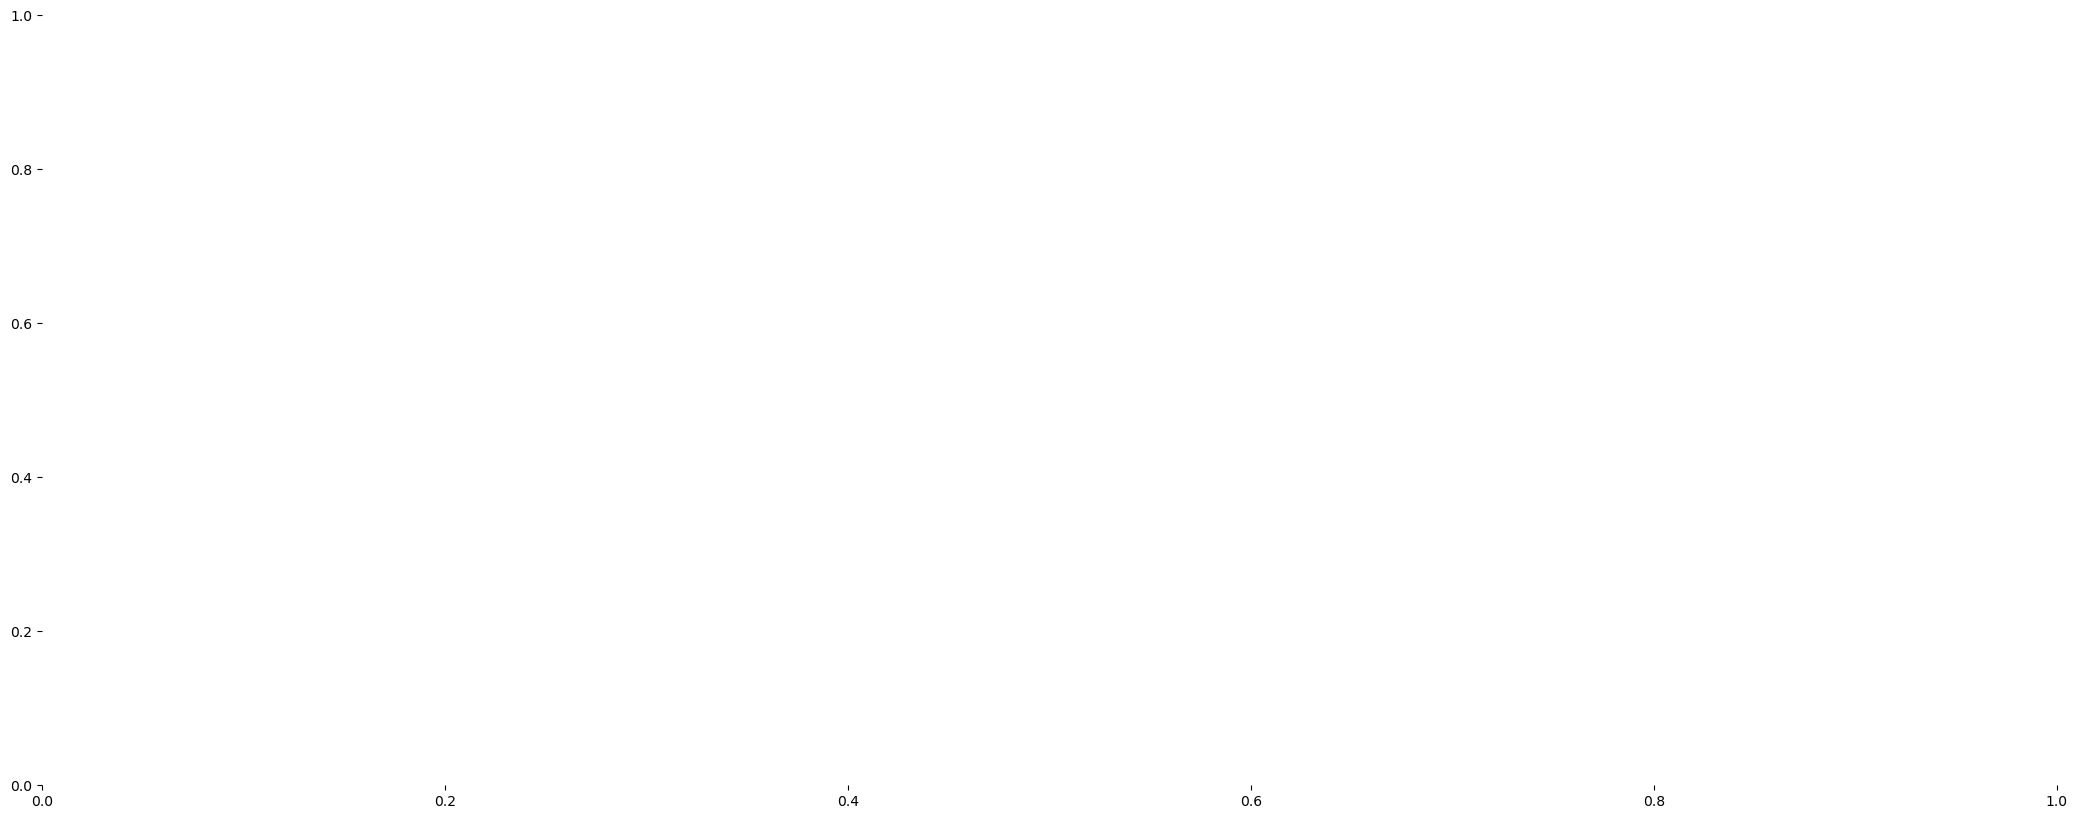

In [125]:
heat_map_dataa = tot_siten_proptype_yearly.pivot(index = 'Year Ending', columns = 'Primary Property Type - Self Selected', values = 'Site Energy Use (GJ)')

plt.figure(figsize=(26,10))

sns.heatmap(heat_map_dataa, cmap = 'viridis', fmt = '.2f', linewidths = 0.5, cbar_kws = {'label': 'Site Energy Use in GJ'})

plt.title('Total Site Energy Use by Property Types Over the Years', fontsize = 18)
plt.xlabel('Property Type', fontsize = 14)
plt.ylabel('Year', fontsize = 14)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()
                                                

It is evident from the heatmap that "office" property types are the top energy consumers over 5 years from 2019 to 2023 but the consumption rate is slightly and consistently decreasing. Distribution centres are showing a constant rate of increase in energy consumption with the highest energy demand in the year 2023 indicating increasing energy demand. The energy use by fitness centres and ice/curling rinks varied over the years. All the other property types shows constant site energy use patterns. 

In [ ]:
# Average energy efficiency by different property types over the years

avg_eui_proptype_yearly = df.groupby(['Year Ending', 'Primary Property Type - Self Selected'])['Site EUI (GJ/m²)'].mean().reset_index()
display(avg_eui_proptype_yearly)

In [ ]:
heat_map_data2 = avg_eui_proptype_yearly.pivot(index = 'Year Ending', columns = 'Primary Property Type - Self Selected', values = 'Site EUI (GJ/m²)')

plt.figure(figsize=(12,10))

sns.heatmap(heat_map_data2, cmap = 'viridis', fmt = '.2f', linewidths = 0.5, cbar_kws = {'label': 'Site EUI (GJ/m²)'})

plt.title('Average EUI of Property Types Over the Years', fontsize = 18)
plt.xlabel('Property Type', fontsize = 14)
plt.ylabel('Year', fontsize = 14)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Distribution sites are showing higher average EUI values over time indicating falling energy efficiency. The energy efficiency of fitness centres improved in 2020 but then again faced a drop over the next two years.Heated swimming pools are showing consistent improvement in energy efficiency.The properties listed under 'other' category are the most energy efficient followed by mixed use property type.

In [ ]:
# Natural gas consumption versus total GHG emissions for different property-types

gas_cons_tot_ghg_proptype = df.groupby(['Primary Property Type - Self Selected'])[['Natural Gas Use (GJ)', 'Total GHG Emissions (Metric Tons CO2e)']].sum().reset_index()
display(gas_cons_tot_ghg_proptype)

#display(df['Total GHG Emissions (Metric Tons CO2e)'])
#print(df['Total GHG Emissions (Metric Tons CO2e)'].sum())

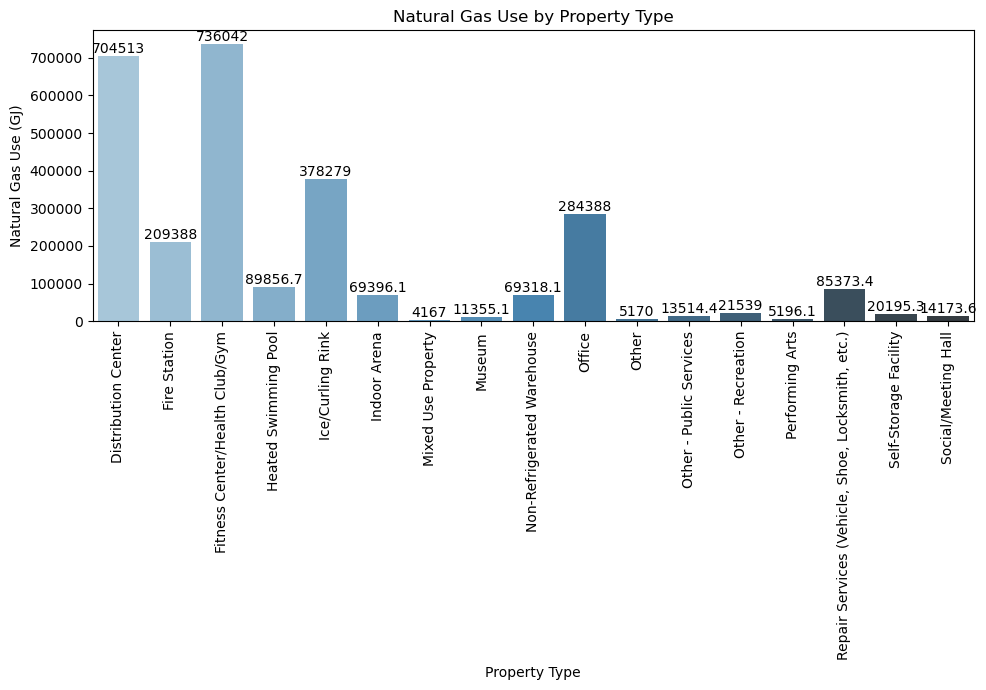

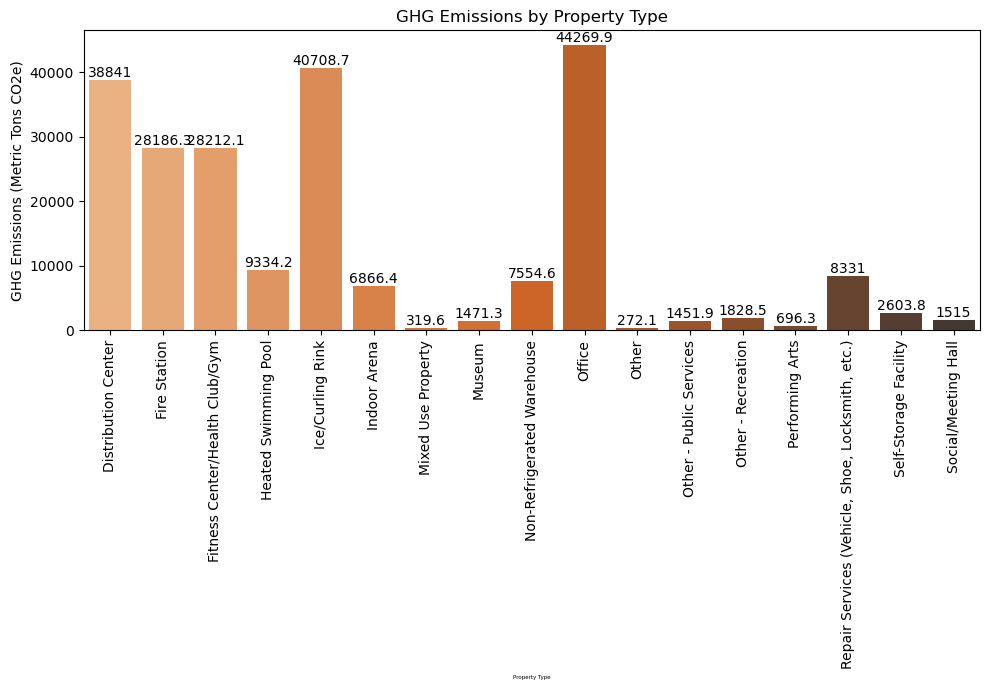

In [126]:


# Bar plot for Natural Gas Use
plt.figure(figsize = (10, 7))
ax = sns.barplot(data = gas_cons_tot_ghg_proptype, x = 'Primary Property Type - Self Selected', y = 'Natural Gas Use (GJ)', palette = 'Blues_d', hue = 'Primary Property Type - Self Selected', errorbar = None )
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Natural Gas Use by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Natural Gas Use (GJ)')
plt.tick_params(axis = 'x', rotation = 90) 
plt.tight_layout()
plt.show()

# Bar plot for GHG Emissions
plt.figure(figsize = (10, 7))
ax = sns.barplot(data = gas_cons_tot_ghg_proptype, x = 'Primary Property Type - Self Selected', y = 'Total GHG Emissions (Metric Tons CO2e)', palette = 'Oranges_d', hue = 'Primary Property Type - Self Selected', errorbar = None)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('GHG Emissions by Property Type')
plt.xlabel('Property Type', fontsize = 4)
plt.ylabel('GHG Emissions (Metric Tons CO2e)')
plt.tick_params(axis = 'x', rotation = 90) 
plt.tight_layout()
plt.show()



Over the analysis period from 2019 to 2023, health clubs and distribution centres are the dominant consumers of natural gas followed by ice curling rinks and offices. Proper resources should be allocated to these property types so that they can use more environmental friendly and renewable energy sources.

Offices, Ice/Curling rinks and Distribution centres are the top GHG emittors followed by fire stations and fitness centres. We can observe that the GHG emissions are related to the natural gas consumption. So in order to reduce the GHG emissions, other alternative resources are to be used.